In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import glob
import os
from skimage import io
from numpy.random import randint

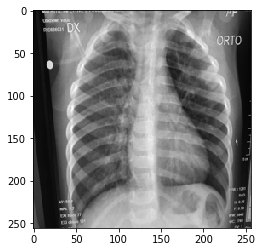

In [2]:
files =  glob.glob('./Updated/Orignal/temp/*.png')
img_rows = 224
img_cols = 224
images = [cv.imread(file,0) for file in files]
# Store sample
img = io.imread('./Updated/Orignal/temp/COVID (2).png')
plt.imshow(img,'gray')
#img = img/255
#if img.shape[0] > img_rows and img.shape[1] > img_cols:
# h, w = img.shape
# img = img[int(h/2)-int(img_rows/2):int(h/2)+int(img_rows/2), int(w/2)-int(img_cols/2):int(w/2)+int(img_cols/2) ]
# #else:
                


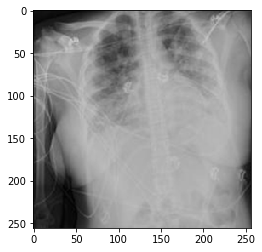

In [32]:
#cropped image
plt.imshow(img, 'gray')

Threshold - 181.8


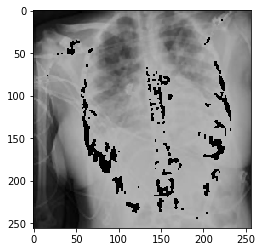

In [44]:
smallest = np.amin(img)
biggest = np.amax(img)
threshold = smallest + 0.9 * (biggest - smallest)

print ('Threshold - {0}'.format(threshold))

ret,thresh5 = cv.threshold(img,threshold,255,cv.THRESH_TOZERO_INV)
plt.imshow(thresh5, 'gray')
#Apply morphological transformations
#strucEle3x3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
strucEle5x5 = cv.getStructuringElement(cv.MORPH_RECT,(2,2))
# #for i in range(5):
# mrimage = cv.dilate(thresh5, strucEle3x3, iterations = 1)
# mrimage = cv.erode(mrimage, strucEle3x3, iterations = 1)

# #Open
opening = cv.morphologyEx(thresh5, cv.MORPH_OPEN, strucEle5x5)
# # #closing
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, strucEle5x5)

# # #combine images 
# h1, w1 = closing.shape[:2]
# h2, w2 = img.shape[:2]

# # #create empty matrix
# final = np.zeros((max(h1, h2), max(w1,w2), 3), np.uint8)

# # #combine 2 images
# final[:h1, :w1, :] = closing
# final[:h2, :w2, :] = img

# arr1,arr2,arr3 = np.nonzero(closing)
# for i in range(arr1.shape[0]):
#     final[arr1[i],arr2[i],arr3[i]] = 0
    
plt.imshow(closing,'gray')

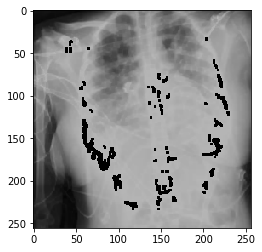

In [43]:
plt.imshow(mrimage,'gray')

In [58]:
#pseudo RGB
#Apply bilateral and equaize filter
blur = cv.bilateralFilter(img,9,75,75)
eq = cv.equalizeHist(img)

#Merged image
#rgbimage = cv.merge((blur, final, eq))
rgbimage = cv.merge((blur, img, eq))

(256, 256)


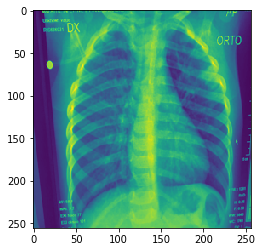

In [65]:
plt.imshow(img)
print (img.shape)

(256, 256)


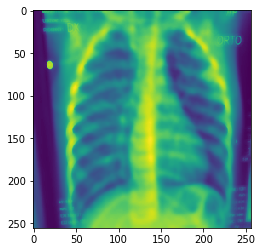

In [64]:
plt.imshow(blur)
print (blur.shape)

(256, 256)


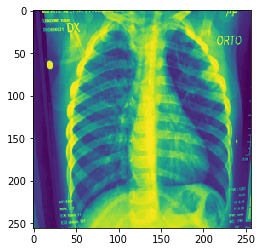

In [66]:
plt.imshow(eq)
print (eq.shape)

(256, 256, 3)


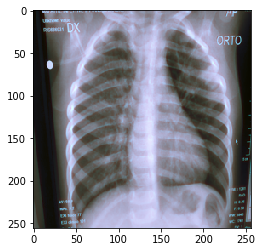

In [67]:
plt.imshow(rgbimage)
print (rgbimage.shape)

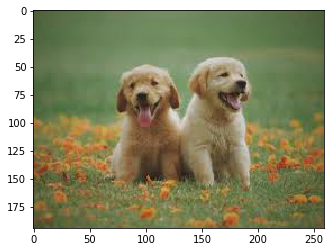

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show


def plot(data_generator):
    """
    Plots 3 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    imshow(image_iterator.next()[0].astype('int'))
    # Plot the images given by the iterator
#     fig, rows = subplots(nrows=1, ncols=2, figsize=(9,9))
#     for row in rows:
#         row.imshow(image_iterator.next()[0].astype('int'))
#         row.axis('off')
    show()
    
#image = imread("image.jpeg")
image = imread('./Updated/Orignal/temp/download.jfif')

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

imshow(images[0])
show()

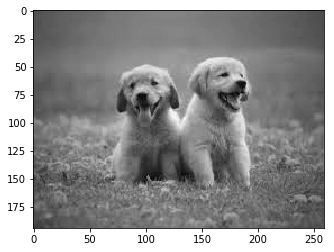

In [41]:
image1 = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow(image1,'gray')


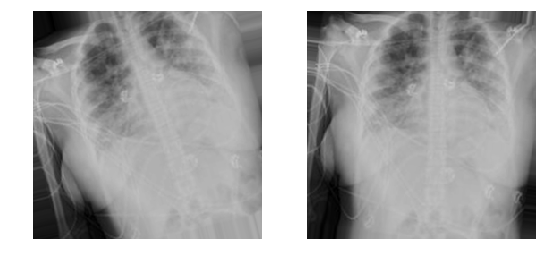

In [39]:
data_generator = ImageDataGenerator(rotation_range=20,
                                   brightness_range=(0.8,0.8))
plot(data_generator)

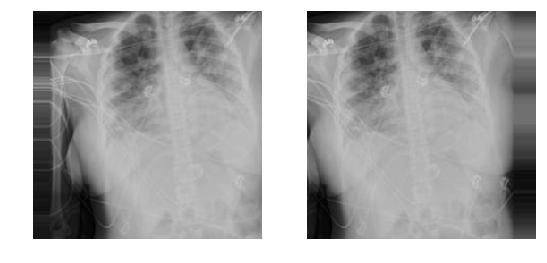

In [41]:
data_generator = ImageDataGenerator(width_shift_range=0.1,
                                   brightness_range=(0.8,0.8))
plot(data_generator)

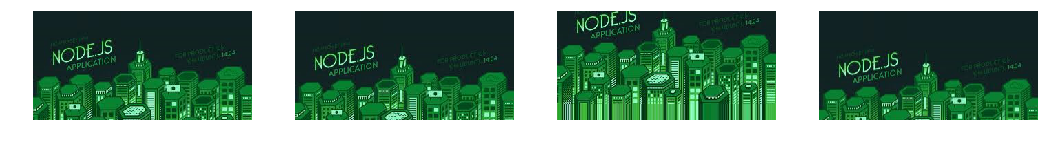

In [14]:
data_generator = ImageDataGenerator(height_shift_range=0.3)
plot(data_generator)

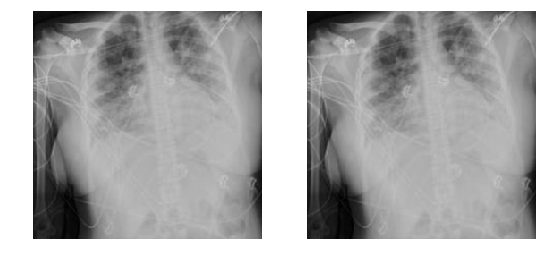

In [43]:
data_generator = ImageDataGenerator(shear_range=0.1,
                            brightness_range=(0.8,0.8))
plot(data_generator)

TypeError: 'AxesSubplot' object is not iterable

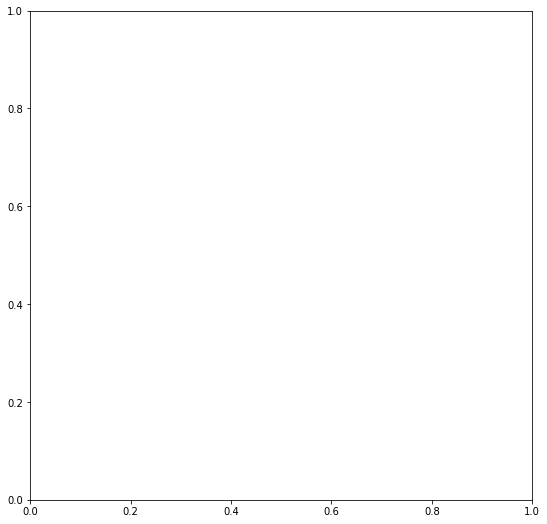

In [58]:
data_generator = ImageDataGenerator(zoom_range=[0.9,0.9],
                            brightness_range=(0.8,0.8))
plot(data_generator)

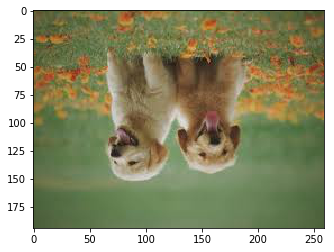

In [21]:
data_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
                            #brightness_range=(0.8,0.8))
plot(data_generator)

In [2]:
#Graphs for the document
import numpy as np
from matplotlib import pyplot as plt
import glob
import os
from numpy.random import randint

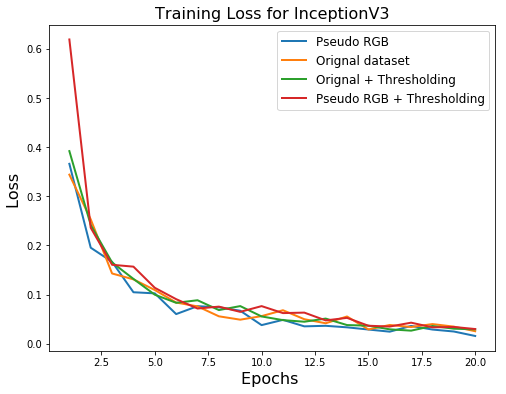

In [3]:
RGB_Loss = [0.3660983741283417, 0.1954108476638794, 0.16668224334716797, 0.10478223860263824, 0.1025080755352974, 0.060355789959430695, 0.07643147557973862, 0.07419117540121078, 0.06715251505374908, 0.03791133686900139, 0.04861973971128464, 0.03539888933300972, 0.036501962691545486, 0.03339453786611557, 0.028937995433807373, 0.024581938982009888, 0.036218103021383286, 0.028887299820780754, 0.02490295097231865, 0.01581096649169922]

Orig_Loss = [0.34403401613235474, 0.25309640169143677, 0.14295390248298645, 0.13100530207157135, 0.10935210436582565, 0.08383189141750336, 0.07603411376476288, 0.05581941455602646, 0.04897753894329071, 0.05621539056301117, 0.06817462295293808, 0.04993491247296333, 0.04166771098971367, 0.055496592074632645, 0.02902836911380291, 0.03818976879119873, 0.03402680903673172, 0.04001656174659729, 0.034834954887628555, 0.0254695825278759]

Thers_Loss = [0.3919720947742462, 0.2417093962430954, 0.16538704931735992, 0.1319255381822586, 0.09979739040136337, 0.08329875022172928, 0.08851540088653564, 0.06850087642669678, 0.07661960273981094, 0.055548131465911865, 0.04805167764425278, 0.044810082763433456, 0.05117664113640785, 0.038002993911504745, 0.036766257137060165, 0.029335547238588333, 0.026646016165614128, 0.03612362593412399, 0.030651085078716278, 0.02931772917509079]

Processed_Loss = [0.6190997362136841, 0.23598642647266388, 0.16065122187137604, 0.15686479210853577, 0.11382576823234558, 0.09070516377687454, 0.07163920253515244, 0.07551248371601105, 0.06489790230989456, 0.07656163722276688, 0.06236003711819649, 0.0633416399359703, 0.04750317707657814, 0.052653178572654724, 0.036643896251916885, 0.03500165790319443, 0.04287363588809967, 0.03339023515582085, 0.03415973111987114, 0.029911383986473083]

epoch_count = range(1, 21)

plt.figure(figsize=[8,6])
plt.plot(epoch_count, RGB_Loss, linewidth=2.0)
plt.plot(epoch_count, Orig_Loss, linewidth=2.0)
plt.plot(epoch_count, Thers_Loss, linewidth=2.0)
plt.plot(epoch_count, Processed_Loss, linewidth=2.0)

plt.legend(['Pseudo RGB', 'Orignal dataset','Orignal + Thresholding', 'Pseudo RGB + Thresholding'],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Training Loss for InceptionV3',fontsize=16)
plt.show();

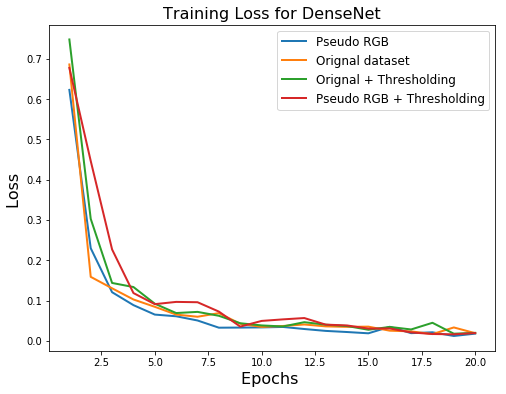

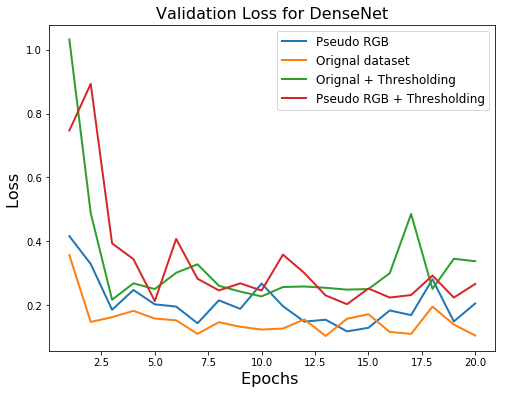

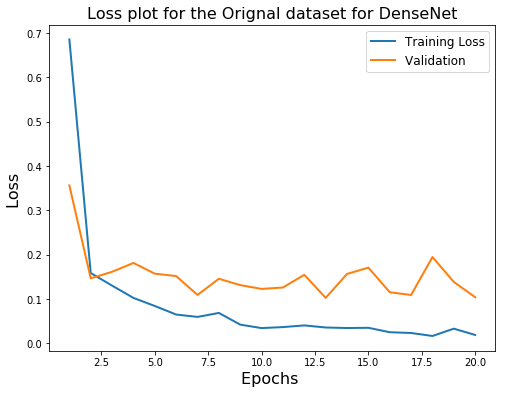

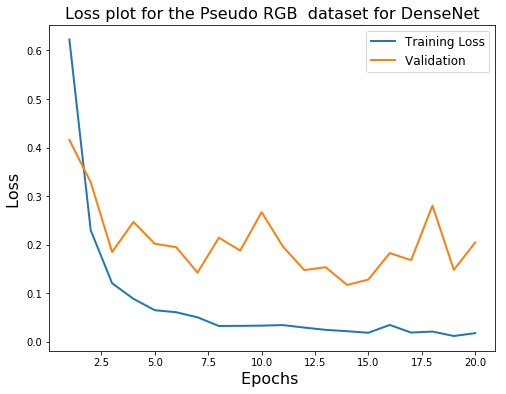

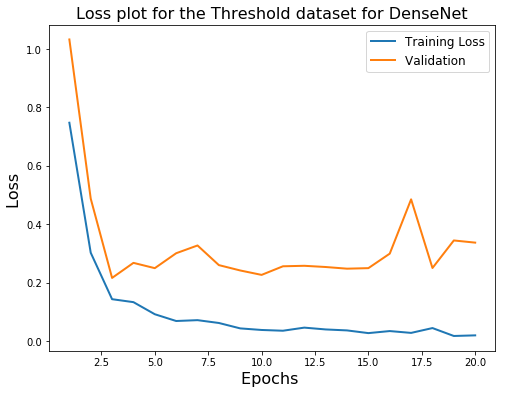

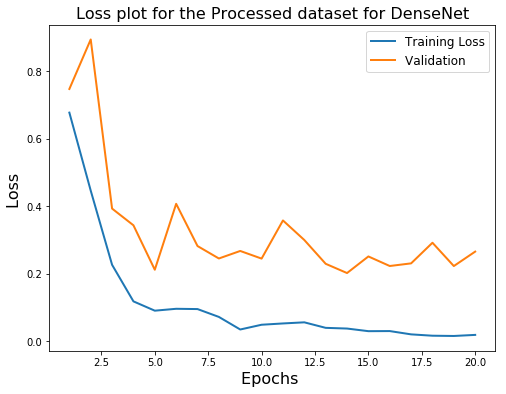

In [4]:
RGB_Loss = [0.6225008964538574, 0.2298145294189453, 0.12075851112604141, 0.08872523903846741, 0.06525775045156479, 0.061101991683244705, 0.0506354384124279, 0.03278011083602905, 0.03305915743112564, 0.033508505672216415, 0.034610167145729065, 0.02948525734245777, 0.02481784299015999, 0.0220283642411232, 0.01884121634066105, 0.03492116555571556, 0.019233155995607376, 0.021331021562218666, 0.012228036299347878, 0.018001534044742584]
Orig_Loss = [0.6855486035346985, 0.1588563472032547, 0.13043376803398132, 0.1027340292930603, 0.08453548699617386, 0.06524642556905746, 0.05989852175116539, 0.06884874403476715, 0.0425020307302475, 0.034674108028411865, 0.036974478513002396, 0.040735192596912384, 0.03604902699589729, 0.034820664674043655, 0.03535740077495575, 0.025358494371175766, 0.023655075579881668, 0.016910798847675323, 0.033378858119249344, 0.019199257716536522]
Thers_Loss = [0.7475160956382751, 0.3026876151561737, 0.14370611310005188, 0.1336013823747635, 0.09224776923656464, 0.06908268481492996, 0.07196934521198273, 0.06230029836297035, 0.04378605633974075, 0.038393065333366394, 0.035788144916296005, 0.04641611501574516, 0.04020305350422859, 0.036886971443891525, 0.02764211967587471, 0.03465515375137329, 0.02838313765823841, 0.04492752254009247, 0.01784553751349449, 0.019940439611673355]
Processed_Loss = [0.6769587993621826, 0.4462307095527649, 0.22685234248638153, 0.11866459995508194, 0.09115363657474518, 0.09673243761062622, 0.09591992944478989, 0.07268086820840836, 0.035493262112140656, 0.0495586022734642, 0.053383950144052505, 0.05669248476624489, 0.04037153720855713, 0.038310956209897995, 0.030540088191628456, 0.030842987820506096, 0.021091530099511147, 0.01711100898683071, 0.016334794461727142, 0.0195343978703022]

RGB_valLoss = [0.41586071252822876, 0.3285001218318939, 0.18499433994293213, 0.24698993563652039, 0.20198886096477509, 0.19503268599510193, 0.14266471564769745, 0.21447566151618958, 0.18799172341823578, 0.2671035826206207, 0.1961992084980011, 0.14781972765922546, 0.1538057029247284, 0.11721445620059967, 0.12842175364494324, 0.18287059664726257, 0.16824311017990112, 0.2806202173233032, 0.14831507205963135, 0.204728901386261]
Orig_valLoss = [0.3564229905605316, 0.1468813419342041, 0.16168883442878723, 0.1816043108701706, 0.15742532908916473, 0.15200559794902802, 0.1094626933336258, 0.14591853320598602, 0.13162420690059662, 0.12304321676492691, 0.12621834874153137, 0.1548982858657837, 0.10282624512910843, 0.15685401856899261, 0.1709878146648407, 0.1155175045132637, 0.10933048278093338, 0.19492051005363464, 0.1387464553117752, 0.1043131947517395]
Thers_valLoss = [1.032435417175293, 0.48784974217414856, 0.21652638912200928, 0.26802125573158264, 0.24989961087703705, 0.30094656348228455, 0.3275170922279358, 0.2603093683719635, 0.24196989834308624, 0.22685186564922333, 0.25632405281066895, 0.25797683000564575, 0.25383803248405457, 0.24812933802604675, 0.24995963275432587, 0.29956987500190735, 0.48536983132362366, 0.2504314184188843, 0.3446912169456482, 0.3372548222541809]
Processed_valLoss = [0.7468860745429993, 0.8933727741241455, 0.3931258022785187, 0.34368976950645447, 0.21227943897247314, 0.40721338987350464, 0.28235048055648804, 0.2455466389656067, 0.2678077220916748, 0.24521003663539886, 0.3580305576324463, 0.3002089858055115, 0.22984257340431213, 0.20246440172195435, 0.251563161611557, 0.2233002483844757, 0.2310899943113327, 0.2920842468738556, 0.2231518179178238, 0.26589110493659973]


epoch_count = range(1, 21)

plt.figure(figsize=[8,6])
plt.plot(epoch_count, RGB_Loss, linewidth=2.0)
plt.plot(epoch_count, Orig_Loss, linewidth=2.0)
plt.plot(epoch_count, Thers_Loss, linewidth=2.0)
plt.plot(epoch_count, Processed_Loss, linewidth=2.0)

plt.legend(['Pseudo RGB', 'Orignal dataset','Orignal + Thresholding', 'Pseudo RGB + Thresholding'],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Training Loss for DenseNet',fontsize=16)
plt.show();
############################################################
plt.figure(figsize=[8,6])
plt.plot(epoch_count, RGB_valLoss, linewidth=2.0)
plt.plot(epoch_count, Orig_valLoss, linewidth=2.0)
plt.plot(epoch_count, Thers_valLoss, linewidth=2.0)
plt.plot(epoch_count, Processed_valLoss, linewidth=2.0)

plt.legend(['Pseudo RGB', 'Orignal dataset','Orignal + Thresholding', 'Pseudo RGB + Thresholding'],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Validation Loss for DenseNet',fontsize=16)
plt.show();
#######################################################################
plt.figure(figsize=[8,6])
plt.plot(epoch_count, Orig_Loss, linewidth=2.0)
plt.plot(epoch_count, Orig_valLoss, linewidth=2.0)
#plt.plot(epoch_count, Thers_valLoss, linewidth=2.0)
#plt.plot(epoch_count, Processed_valLoss, linewidth=2.0)

plt.legend(['Training Loss', 'Validation '],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Loss plot for the Orignal dataset for DenseNet',fontsize=16)
plt.show();
#######################################################################
plt.figure(figsize=[8,6])
plt.plot(epoch_count, RGB_Loss, linewidth=2.0)
plt.plot(epoch_count, RGB_valLoss, linewidth=2.0)
#plt.plot(epoch_count, Thers_valLoss, linewidth=2.0)
#plt.plot(epoch_count, Processed_valLoss, linewidth=2.0)

plt.legend(['Training Loss', 'Validation '],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Loss plot for the Pseudo RGB  dataset for DenseNet',fontsize=16)
plt.show();
#######################################################################
plt.figure(figsize=[8,6])
plt.plot(epoch_count, Thers_Loss, linewidth=2.0)
plt.plot(epoch_count, Thers_valLoss, linewidth=2.0)
#plt.plot(epoch_count, Thers_valLoss, linewidth=2.0)
#plt.plot(epoch_count, Processed_valLoss, linewidth=2.0)

plt.legend(['Training Loss', 'Validation '],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Loss plot for the Threshold dataset for DenseNet',fontsize=16)
plt.show();
#######################################################################
plt.figure(figsize=[8,6])
plt.plot(epoch_count, Processed_Loss, linewidth=2.0)
plt.plot(epoch_count, Processed_valLoss, linewidth=2.0)
#plt.plot(epoch_count, Thers_valLoss, linewidth=2.0)
#plt.plot(epoch_count, Processed_valLoss, linewidth=2.0)

plt.legend(['Training Loss', 'Validation '],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Loss plot for the Processed dataset for DenseNet',fontsize=16)
plt.show();

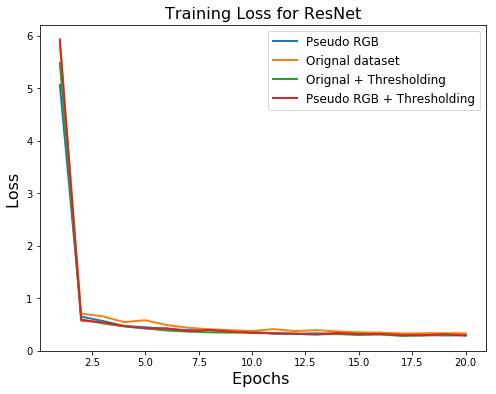

In [23]:
RGB_Loss = [5.064568042755127, 0.6501387357711792, 0.5680655837059021, 0.4721662700176239, 0.44724583625793457, 0.41591575741767883, 0.3930132985115051, 0.387989342212677, 0.36897650361061096, 0.36006882786750793, 0.32354646921157837, 0.32645002007484436, 0.330354779958725, 0.32474949955940247, 0.3135473132133484, 0.3121291995048523, 0.31012535095214844, 0.31080326437950134, 0.29278677701950073, 0.295941561460495]

Orig_Loss = [5.834717750549316, 0.7077272534370422, 0.655400812625885, 0.545116662979126, 0.5801737904548645, 0.4898078441619873, 0.4374381899833679, 0.4079909026622772, 0.3923361599445343, 0.3756496012210846, 0.41207200288772583, 0.3743150234222412, 0.39219406247138977, 0.36782917380332947, 0.3507293462753296, 0.3460398018360138, 0.32880234718322754, 0.3329504728317261, 0.3350239098072052, 0.3317624032497406]

Thers_Loss = [5.480631351470947, 0.5975359082221985, 0.5221354365348816, 0.46324336528778076, 0.42710113525390625, 0.38495707511901855, 0.3655759394168854, 0.3490675091743469, 0.34498438239097595, 0.34711378812789917, 0.33311140537261963, 0.32197147607803345, 0.3141404986381531, 0.3166041374206543, 0.3009623885154724, 0.3136969804763794, 0.2810596227645874, 0.29022735357284546, 0.2961595952510834, 0.2979414463043213]

Processed_Loss = [5.929711818695068, 0.5754555463790894, 0.5416544675827026, 0.472016841173172, 0.42490360140800476, 0.4276392161846161, 0.37134289741516113, 0.39761361479759216, 0.36405906081199646, 0.33927133679389954, 0.33343416452407837, 0.32236313819885254, 0.30858391523361206, 0.33872368931770325, 0.32003864645957947, 0.31905144453048706, 0.3004094362258911, 0.2960203289985657, 0.3143536150455475, 0.28830644488334656]

epoch_count = range(1, 21)

plt.figure(figsize=[8,6])
plt.plot(epoch_count, RGB_Loss, linewidth=2.0)
plt.plot(epoch_count, Orig_Loss, linewidth=2.0)
plt.plot(epoch_count, Thers_Loss, linewidth=2.0)
plt.plot(epoch_count, Processed_Loss, linewidth=2.0)
#plt.yscale('log', basey=2)
#plt.yticks([0.2,0.5,5])
plt.legend(['Pseudo RGB', 'Orignal dataset','Orignal + Thresholding', 'Pseudo RGB + Thresholding'],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Training Loss for ResNet',fontsize=16)
plt.show();

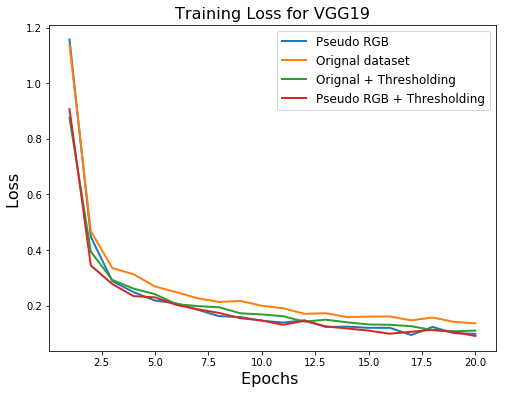

In [15]:
RGB_Loss = [1.1570502519607544, 0.44777947664260864, 0.2889639437198639, 0.24891580641269684, 0.21885667741298676, 0.20844173431396484, 0.18569087982177734, 0.16258414089679718, 0.15927830338478088, 0.14624738693237305, 0.13937285542488098, 0.14773988723754883, 0.12382077425718307, 0.12493882328271866, 0.12059448659420013, 0.12073782831430435, 0.09476505219936371, 0.1238679513335228, 0.10123278200626373, 0.09891761839389801]

Orig_Loss = [1.1371132135391235, 0.4684079885482788, 0.3356683552265167, 0.31321460008621216, 0.2692711055278778, 0.2487131655216217, 0.2269493192434311, 0.21352127194404602, 0.21730488538742065, 0.2000347524881363, 0.1909252554178238, 0.17104776203632355, 0.17307162284851074, 0.15923063457012177, 0.16097496449947357, 0.16136856377124786, 0.1475711166858673, 0.1577049046754837, 0.1420418620109558, 0.13690495491027832]

Thers_Loss = [0.8760970830917358, 0.39436250925064087, 0.2930643856525421, 0.2615797221660614, 0.2415061742067337, 0.20597197115421295, 0.19863931834697723, 0.19457590579986572, 0.17283987998962402, 0.1687808483839035, 0.1623217910528183, 0.14293983578681946, 0.14988186955451965, 0.14037591218948364, 0.1327711045742035, 0.13157156109809875, 0.12644517421722412, 0.11238217353820801, 0.10828683525323868, 0.11068231612443924]

Processed_Loss = [0.9070949554443359, 0.3445192277431488, 0.27843937277793884, 0.23445282876491547, 0.23017480969429016, 0.203170508146286, 0.18724696338176727, 0.17428924143314362, 0.15524359047412872, 0.1471744328737259, 0.13143222033977509, 0.1459154486656189, 0.12568143010139465, 0.11821398884057999, 0.11065036058425903, 0.09951440989971161, 0.10642142593860626, 0.11347165703773499, 0.105866938829422, 0.09134823828935623]

epoch_count = range(1, 21)

plt.figure(figsize=[8,6])
plt.plot(epoch_count, RGB_Loss, linewidth=2.0)
plt.plot(epoch_count, Orig_Loss, linewidth=2.0)
plt.plot(epoch_count, Thers_Loss, linewidth=2.0)
plt.plot(epoch_count, Processed_Loss, linewidth=2.0)
#plt.yscale('log', basey=2)
#plt.yticks([0.2,0.5,5])
plt.legend(['Pseudo RGB', 'Orignal dataset','Orignal + Thresholding', 'Pseudo RGB + Thresholding'],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Training Loss for VGG19',fontsize=16)
plt.show();

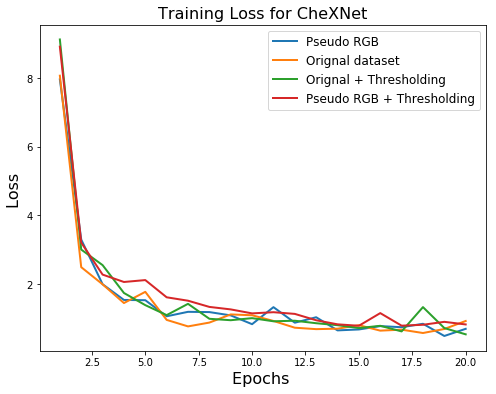

In [22]:
RGB_Loss = [7.958968162536621, 3.2995293140411377, 1.9988951683044434, 1.541623592376709, 1.534372329711914, 1.0661252737045288, 1.1959477663040161, 1.188217282295227, 1.0919058322906494, 0.8364607691764832, 1.3317986726760864, 0.8792350888252258, 1.0381443500518799, 0.6559004187583923, 0.6826815009117126, 0.780616819858551, 0.7478657364845276, 0.8476967215538025, 0.49306249618530273, 0.7011213898658752]

Orig_Loss = [8.068001747131348, 2.495424509048462, 1.9968665838241577, 1.4514415264129639, 1.7773151397705078, 0.9611042737960815, 0.7716549634933472, 0.8829717636108398, 1.120374321937561, 1.096248745918274, 0.9299429059028625, 0.7335870862007141, 0.6920992136001587, 0.7051133513450623, 0.8068550825119019, 0.6483173966407776, 0.6767266988754272, 0.5794504880905151, 0.6962904334068298, 0.9290943145751953]

Thers_Loss = [9.122333526611328, 3.0078999996185303, 2.555389165878296, 1.7443740367889404, 1.3905396461486816, 1.1000500917434692, 1.4286093711853027, 0.9931345582008362, 0.9518007636070251, 1.011749267578125, 0.9206093549728394, 0.9369692206382751, 0.8642154932022095, 0.8075351715087891, 0.7225118279457092, 0.788993239402771, 0.6262256503105164, 1.3330938816070557, 0.723210334777832, 0.5408639311790466]

Processed_Loss = [8.912870407104492, 3.209738254547119, 2.279392719268799, 2.0643200874328613, 2.1195805072784424, 1.6187005043029785, 1.5193320512771606, 1.3388996124267578, 1.2664045095443726, 1.1502703428268433, 1.1849617958068848, 1.1356542110443115, 0.950493335723877, 0.8319509029388428, 0.789856493473053, 1.15864896774292, 0.7928410768508911, 0.8191965818405151, 0.9046055674552917, 0.828569769859314]

epoch_count = range(1, 21)

plt.figure(figsize=[8,6])
plt.plot(epoch_count, RGB_Loss, linewidth=2.0)
plt.plot(epoch_count, Orig_Loss, linewidth=2.0)
plt.plot(epoch_count, Thers_Loss, linewidth=2.0)
plt.plot(epoch_count, Processed_Loss, linewidth=2.0)
#plt.yscale('log', basey=2)
#plt.yticks([0.2,0.5,5])
plt.legend(['Pseudo RGB', 'Orignal dataset','Orignal + Thresholding', 'Pseudo RGB + Thresholding'],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Training Loss for CheXNet',fontsize=16)
plt.show();

PLot the model performance on dataset

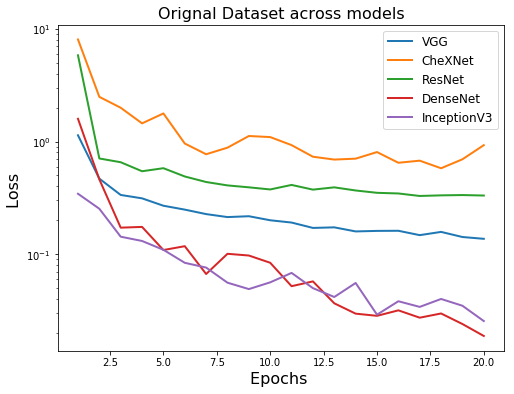

In [17]:
VGG = [1.1371132135391235, 0.4684079885482788, 0.3356683552265167, 0.31321460008621216, 0.2692711055278778, 0.2487131655216217, 0.2269493192434311, 0.21352127194404602, 0.21730488538742065, 0.2000347524881363, 0.1909252554178238, 0.17104776203632355, 0.17307162284851074, 0.15923063457012177, 0.16097496449947357, 0.16136856377124786, 0.1475711166858673, 0.1577049046754837, 0.1420418620109558, 0.13690495491027832]

ChexNet = [8.068001747131348, 2.495424509048462, 1.9968665838241577, 1.4514415264129639, 1.7773151397705078, 0.9611042737960815, 0.7716549634933472, 0.8829717636108398, 1.120374321937561, 1.096248745918274, 0.9299429059028625, 0.7335870862007141, 0.6920992136001587, 0.7051133513450623, 0.8068550825119019, 0.6483173966407776, 0.6767266988754272, 0.5794504880905151, 0.6962904334068298, 0.9290943145751953]

ResNet = [5.834717750549316, 0.7077272534370422, 0.655400812625885, 0.545116662979126, 0.5801737904548645, 0.4898078441619873, 0.4374381899833679, 0.4079909026622772, 0.3923361599445343, 0.3756496012210846, 0.41207200288772583, 0.3743150234222412, 0.39219406247138977, 0.36782917380332947, 0.3507293462753296, 0.3460398018360138, 0.32880234718322754, 0.3329504728317261, 0.3350239098072052, 0.3317624032497406]

DenseNet = [1.5931259393692017, 0.4616064131259918, 0.1719849854707718, 0.1746547967195511, 0.108864925801754, 0.11774615943431854, 0.06666635721921921, 0.10077883303165436, 0.09728150069713593, 0.0838845744729042, 0.05196992680430412, 0.057316720485687256, 0.03660435602068901, 0.02963552623987198, 0.028346918523311615, 0.03171080723404884, 0.027288151904940605, 0.02974340319633484, 0.023973632603883743, 0.018775206059217453]

InceptionV3 = [0.34403401613235474, 0.25309640169143677, 0.14295390248298645, 0.13100530207157135, 0.10935210436582565, 0.08383189141750336, 0.07603411376476288, 0.05581941455602646, 0.04897753894329071, 0.05621539056301117, 0.06817462295293808, 0.04993491247296333, 0.04166771098971367, 0.055496592074632645, 0.02902836911380291, 0.03818976879119873, 0.03402680903673172, 0.04001656174659729, 0.034834954887628555, 0.0254695825278759]

epoch_count = range(1, 21)

plt.figure(figsize=[8,6])
plt.plot(epoch_count, VGG, linewidth=2.0)
plt.plot(epoch_count, ChexNet, linewidth=2.0)
plt.plot(epoch_count, ResNet, linewidth=2.0)
plt.plot(epoch_count, DenseNet, linewidth=2.0)
plt.plot(epoch_count, InceptionV3, linewidth=2.0)
plt.yscale('log')#, basey=2)
#plt.yticks([0.2,0.5,5])
plt.legend(['VGG', 'CheXNet','ResNet', 'DenseNet', 'InceptionV3'],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Orignal Dataset across models',fontsize=16)
plt.show();

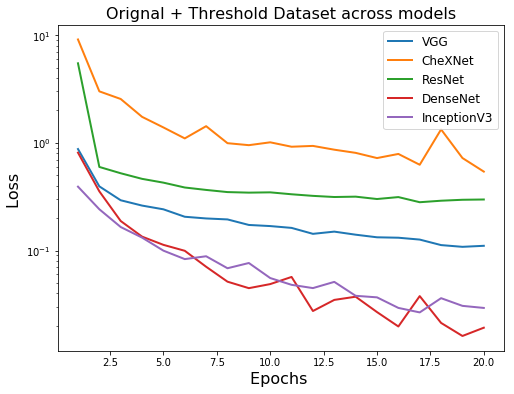

In [18]:
VGG = [0.8760970830917358, 0.39436250925064087, 0.2930643856525421, 0.2615797221660614, 0.2415061742067337, 0.20597197115421295, 0.19863931834697723, 0.19457590579986572, 0.17283987998962402, 0.1687808483839035, 0.1623217910528183, 0.14293983578681946, 0.14988186955451965, 0.14037591218948364, 0.1327711045742035, 0.13157156109809875, 0.12644517421722412, 0.11238217353820801, 0.10828683525323868, 0.11068231612443924]

ChexNet = [9.122333526611328, 3.0078999996185303, 2.555389165878296, 1.7443740367889404, 1.3905396461486816, 1.1000500917434692, 1.4286093711853027, 0.9931345582008362, 0.9518007636070251, 1.011749267578125, 0.9206093549728394, 0.9369692206382751, 0.8642154932022095, 0.8075351715087891, 0.7225118279457092, 0.788993239402771, 0.6262256503105164, 1.3330938816070557, 0.723210334777832, 0.5408639311790466]

ResNet = [5.480631351470947, 0.5975359082221985, 0.5221354365348816, 0.46324336528778076, 0.42710113525390625, 0.38495707511901855, 0.3655759394168854, 0.3490675091743469, 0.34498438239097595, 0.34711378812789917, 0.33311140537261963, 0.32197147607803345, 0.3141404986381531, 0.3166041374206543, 0.3009623885154724, 0.3136969804763794, 0.2810596227645874, 0.29022735357284546, 0.2961595952510834, 0.2979414463043213]

DenseNet = [0.8111435770988464, 0.35458049178123474, 0.18808183073997498, 0.13468097150325775, 0.11296223849058151, 0.0994834378361702, 0.07071609795093536, 0.051402460783720016, 0.04474281892180443, 0.04880990460515022, 0.056870341300964355, 0.027455845847725868, 0.03481358662247658, 0.037269484251737595, 0.026833167299628258, 0.01972138322889805, 0.037764694541692734, 0.02127966843545437, 0.01609819009900093, 0.01921118050813675]

InceptionV3 = [0.3919720947742462, 0.2417093962430954, 0.16538704931735992, 0.1319255381822586, 0.09979739040136337, 0.08329875022172928, 0.08851540088653564, 0.06850087642669678, 0.07661960273981094, 0.055548131465911865, 0.04805167764425278, 0.044810082763433456, 0.05117664113640785, 0.038002993911504745, 0.036766257137060165, 0.029335547238588333, 0.026646016165614128, 0.03612362593412399, 0.030651085078716278, 0.02931772917509079]

epoch_count = range(1, 21)

plt.figure(figsize=[8,6])
plt.plot(epoch_count, VGG, linewidth=2.0)
plt.plot(epoch_count, ChexNet, linewidth=2.0)
plt.plot(epoch_count, ResNet, linewidth=2.0)
plt.plot(epoch_count, DenseNet, linewidth=2.0)
plt.plot(epoch_count, InceptionV3, linewidth=2.0)
plt.yscale('log')#, basey=2)
#plt.yticks([0.2,0.5,5])
plt.legend(['VGG', 'CheXNet','ResNet', 'DenseNet', 'InceptionV3'],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Orignal + Threshold Dataset across models',fontsize=16)
plt.show();

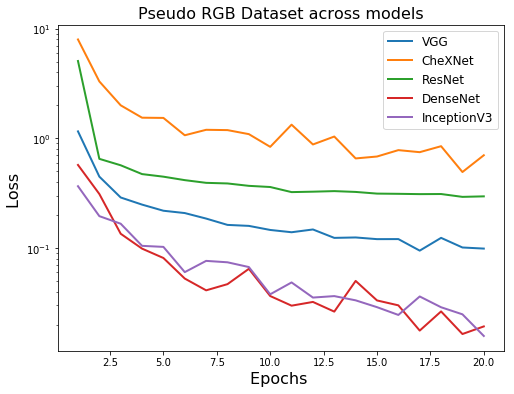

In [19]:
VGG = [1.1570502519607544, 0.44777947664260864, 0.2889639437198639, 0.24891580641269684, 0.21885667741298676, 0.20844173431396484, 0.18569087982177734, 0.16258414089679718, 0.15927830338478088, 0.14624738693237305, 0.13937285542488098, 0.14773988723754883, 0.12382077425718307, 0.12493882328271866, 0.12059448659420013, 0.12073782831430435, 0.09476505219936371, 0.1238679513335228, 0.10123278200626373, 0.09891761839389801]

ChexNet = [7.958968162536621, 3.2995293140411377, 1.9988951683044434, 1.541623592376709, 1.534372329711914, 1.0661252737045288, 1.1959477663040161, 1.188217282295227, 1.0919058322906494, 0.8364607691764832, 1.3317986726760864, 0.8792350888252258, 1.0381443500518799, 0.6559004187583923, 0.6826815009117126, 0.780616819858551, 0.7478657364845276, 0.8476967215538025, 0.49306249618530273, 0.7011213898658752]

ResNet = [5.064568042755127, 0.6501387357711792, 0.5680655837059021, 0.4721662700176239, 0.44724583625793457, 0.41591575741767883, 0.3930132985115051, 0.387989342212677, 0.36897650361061096, 0.36006882786750793, 0.32354646921157837, 0.32645002007484436, 0.330354779958725, 0.32474949955940247, 0.3135473132133484, 0.3121291995048523, 0.31012535095214844, 0.31080326437950134, 0.29278677701950073, 0.295941561460495]

DenseNet = [0.5719648599624634, 0.31100571155548096, 0.13502417504787445, 0.09881309419870377, 0.08118836581707001, 0.05274075269699097, 0.04119042679667473, 0.046914223581552505, 0.06467931717634201, 0.03655373305082321, 0.02986152470111847, 0.032296426594257355, 0.02636338584125042, 0.050194501876831055, 0.03332872316241264, 0.03006158024072647, 0.017703069373965263, 0.026465173810720444, 0.016472505405545235, 0.019317805767059326]

InceptionV3 = [0.3660983741283417, 0.1954108476638794, 0.16668224334716797, 0.10478223860263824, 0.1025080755352974, 0.060355789959430695, 0.07643147557973862, 0.07419117540121078, 0.06715251505374908, 0.03791133686900139, 0.04861973971128464, 0.03539888933300972, 0.036501962691545486, 0.03339453786611557, 0.028937995433807373, 0.024581938982009888, 0.036218103021383286, 0.028887299820780754, 0.02490295097231865, 0.01581096649169922]

epoch_count = range(1, 21)

plt.figure(figsize=[8,6])
plt.plot(epoch_count, VGG, linewidth=2.0)
plt.plot(epoch_count, ChexNet, linewidth=2.0)
plt.plot(epoch_count, ResNet, linewidth=2.0)
plt.plot(epoch_count, DenseNet, linewidth=2.0)
plt.plot(epoch_count, InceptionV3, linewidth=2.0)
plt.yscale('log')#, basey=2)
#plt.yticks([0.2,0.5,5])
plt.legend(['VGG', 'CheXNet','ResNet', 'DenseNet', 'InceptionV3'],fontsize=12)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Pseudo RGB Dataset across models',fontsize=16)
plt.show();

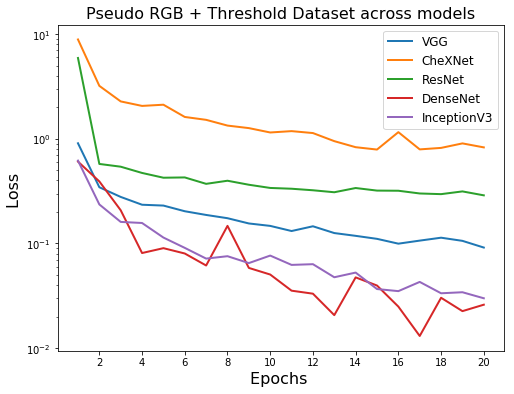

In [20]:
VGG = [0.9070949554443359, 0.3445192277431488, 0.27843937277793884, 0.23445282876491547, 0.23017480969429016, 0.203170508146286, 0.18724696338176727, 0.17428924143314362, 0.15524359047412872, 0.1471744328737259, 0.13143222033977509, 0.1459154486656189, 0.12568143010139465, 0.11821398884057999, 0.11065036058425903, 0.09951440989971161, 0.10642142593860626, 0.11347165703773499, 0.105866938829422, 0.09134823828935623]

ChexNet = [8.912870407104492, 3.209738254547119, 2.279392719268799, 2.0643200874328613, 2.1195805072784424, 1.6187005043029785, 1.5193320512771606, 1.3388996124267578, 1.2664045095443726, 1.1502703428268433, 1.1849617958068848, 1.1356542110443115, 0.950493335723877, 0.8319509029388428, 0.789856493473053, 1.15864896774292, 0.7928410768508911, 0.8191965818405151, 0.9046055674552917, 0.828569769859314]

ResNet = [5.929711818695068, 0.5754555463790894, 0.5416544675827026, 0.472016841173172, 0.42490360140800476, 0.4276392161846161, 0.37134289741516113, 0.39761361479759216, 0.36405906081199646, 0.33927133679389954, 0.33343416452407837, 0.32236313819885254, 0.30858391523361206, 0.33872368931770325, 0.32003864645957947, 0.31905144453048706, 0.3004094362258911, 0.2960203289985657, 0.3143536150455475, 0.28830644488334656]

DenseNet = [0.6060329079627991, 0.3915168344974518, 0.20767416059970856, 0.08096560090780258, 0.09012658894062042, 0.08014214038848877, 0.06154077872633934, 0.14725574851036072, 0.05834035947918892, 0.05043978989124298, 0.03535227105021477, 0.0330900102853775, 0.020628804340958595, 0.04736839607357979, 0.03959491103887558, 0.024894854053854942, 0.013043356128036976, 0.030245425179600716, 0.022534050047397614, 0.025966839864850044]

InceptionV3 = [0.6190997362136841, 0.23598642647266388, 0.16065122187137604, 0.15686479210853577, 0.11382576823234558, 0.09070516377687454, 0.07163920253515244, 0.07551248371601105, 0.06489790230989456, 0.07656163722276688, 0.06236003711819649, 0.0633416399359703, 0.04750317707657814, 0.052653178572654724, 0.036643896251916885, 0.03500165790319443, 0.04287363588809967, 0.03339023515582085, 0.03415973111987114, 0.029911383986473083]

epoch_count = range(1, 21)

plt.figure(figsize=[8,6])
plt.plot(epoch_count, VGG, linewidth=2.0)
plt.plot(epoch_count, ChexNet, linewidth=2.0)
plt.plot(epoch_count, ResNet, linewidth=2.0)
plt.plot(epoch_count, DenseNet, linewidth=2.0)
plt.plot(epoch_count, InceptionV3, linewidth=2.0)
plt.yscale('log')#, basey=2)
#plt.yticks([0.2,0.5,5])
plt.legend(['VGG', 'CheXNet','ResNet', 'DenseNet', 'InceptionV3'],fontsize=12)
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss ',fontsize=16)

plt.title('Pseudo RGB + Threshold Dataset across models',fontsize=16)
plt.show();